In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

uploaded = files.upload()  # Upload the file from your local machine
df = pd.read_csv("financial_health_analysis_dataset.csv")  # Replace with the name of your file


Saving financial_health_analysis_dataset.csv to financial_health_analysis_dataset.csv


In [ ]:
import scipy.stats as stats




print(df.head())  # Display first 5 rows

# 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group data by month and calculate mean profit per month
df['Month'] = df['Date'].dt.to_period('M')
monthly_profits = df.groupby('Month')['Profit'].mean()

# Perform one-sample t-test
benchmark = 10000  # Hypothetical threshold
t_stat, p_value = stats.ttest_1samp(monthly_profits, benchmark, alternative='greater')

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")


# Decision
if p_value < 0.05:
    print("Reject the null hypothesis: The average monthly profit is significantly greater than $10,000.")
else:
    print("Fail to reject the null hypothesis: Not enough evidence to conclude the average monthly profit is greater than $10,000.")

         Date  Revenue  Expenses  Profit  Cash Flow   Debt  Assets  \
0  2000-01-01    91910     56996   34914      36583  37428   50606   
1  2000-01-02    76044     17614   58430      57621  15068  143451   
2  2000-01-03    87214     49647   37567      42285  20229   67733   
3  2000-01-04    53827     72940  -19113     -16957  33478   90394   
4  2000-01-05    75820     15620   60200      63913  21908  110797   

   Liabilities  Marketing Spend  Employee Count  Tax Paid  Operational Cost  
0        50085            14159             278      7633          42235.94  
1        53894            12173             346     11913          12960.62  
2        30019            15107             379     11490          39471.72  
3        53827            17132             444      3905          56926.27  
4        28184            14723             220     13197          12298.48  
T-Statistic: 10.933663259775107
P-Value: 5.561837774300692e-26
Reject the null hypothesis: The average monthly 

In [ ]:
# Perform a paired t-test
t_stat, p_value = stats.ttest_rel(df['Revenue'], df['Expenses'])

# Print results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Decision
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The average revenue and expenses are significantly different.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between average revenue and expenses.")

T-Statistic: 58.090382866449985
P-Value: 0.0
Reject the null hypothesis: The average revenue and expenses are significantly different.


In [ ]:

mean_revenue = df['Revenue'].mean()
mean_expenses = df['Expenses'].mean()

# Perform a paired t-test
t_stat, p_value = stats.ttest_rel(df['Revenue'], df['Expenses'])

# Print results
print(f"Average Revenue: {mean_revenue}")
print(f"Average Expenses: {mean_expenses}")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Decision
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The average revenue and expenses are significantly different.")
    # Check which one is greater
    if mean_revenue > mean_expenses:
        print("Revenue is significantly higher than expenses.")
    else:
        print("Expenses are significantly higher than revenue.")
else:
    print("Fail to reject the null hypothesis: No significant difference between revenue and expenses.")

Average Revenue: 59508.5451
Average Expenses: 47249.8364
T-Statistic: 58.090382866449985
P-Value: 0.0
Reject the null hypothesis: The average revenue and expenses are significantly different.
Revenue is significantly higher than expenses.


In [ ]:
from scipy import stats

t_stat, p_value = stats.ttest_1samp(df['Revenue'], 50000)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The average revenue is significantly different from $50,000.")
else:
    print("Fail to reject the null hypothesis: No significant difference from $50,000.")


T-Statistic: 57.938805660416534
P-Value: 0.0
Reject the null hypothesis: The average revenue is significantly different from $50,000.


In [ ]:
df['Revenue'].mean()


59508.5451

In [ ]:
t_stat, p_value = stats.ttest_rel(df['Revenue'], df['Expenses'])

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Revenue and expenses are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between revenue and expenses.")


T-Statistic: 58.090382866449985
P-Value: 0.0
Reject the null hypothesis: Revenue and expenses are significantly different.


In [ ]:
print(df['Revenue'].mean() - df['Expenses'].mean())


12258.708700000003


In [ ]:
from scipy import stats

# Null Hypothesis (H0): Average Profit = 0
# Alternative Hypothesis (H1): Average Profit > 0

t_stat, p_value = stats.ttest_1samp(df['Profit'], 0)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Decision
if p_value < 0.05 and t_stat > 0:
    print("Reject the null hypothesis: The business is consistently profitable.")
else:
    print("Fail to reject the null hypothesis: The business is NOT consistently profitable.")


T-Statistic: 58.090382866449985
P-Value: 0.0
Reject the null hypothesis: The business is consistently profitable.


Summary of Hypothesis Testing Results
One-Sample t-Test: Average Monthly Profit vs. $10,000 Benchmark
Hypothesis:
Null: The average monthly profit is equal to 10,000.
Alternative: The average monthly profit is greater than 10,000.
Results:
T-Statistic: 10.93
P-Value: 5.56e-26 (close to zero, highly significant)
Conclusion: The null hypothesis is rejected, indicating that the average profit is significantly higher than 10,000.
Two-Sample t-Test: Comparison of Average Revenue and Expenses
Hypothesis:
Null: Revenue and expenses are equal.
Alternative: Revenue and expenses are different.
Results:
T-Statistic: 58.09
P-Value: 0.0 (highly significant)
Conclusion: The null hypothesis is rejected, showing a significant difference between revenue and expenses. On average, revenue exceeds expenses by 12,258.71.
One-Sample t-Test: Business Profitability Assessment
Hypothesis:
Null: The average profit is zero.
Alternative: The average profit is greater than zero.
Results:
T-Statistic: 58.09
P-Value: 0.0 (highly significant)
Conclusion: The null hypothesis is rejected, confirming that the business is consistently profitable.

Interpretation of P-Values for Hypothesis Tests
P-values indicate whether the results are statistically significant, meaning they are unlikely to have occurred by random chance. A common significance threshold (alpha) is 0.05 (5%). If the P-value is below this threshold, the null hypothesis is rejected.

One-Sample t-Test: Is the Average Monthly Profit Greater Than 10,000?
P-Value: 5.56e-26 (extremely small)
Interpretation: The probability of observing this data if the true average profit were 10,000 is nearly zero. Since the P-value is below 0.05, the null hypothesis is rejected.
Conclusion: The average monthly profit is significantly greater than 10,000.
Two-Sample t-Test: Are Revenue and Expenses Significantly Different?
P-Value: 0.0 (highly significant)
Interpretation: The likelihood that revenue and expenses are actually equal is extremely low. Since the P-value is below 0.05, the null hypothesis is rejected.
Conclusion: Revenue and expenses are significantly different, with revenue being higher.
One-Sample t-Test: Is the Business Consistently Profitable?
P-Value: 0.0 (extremely small)
Interpretation: The probability that the business's true average profit is zero is nearly nonexistent. Since the P-value is below 0.05, the null hypothesis is rejected.
Conclusion: The business is consistently profitable.
Final Summary
All tests produced extremely small P-values, confirming statistical significance.
In each case, the null hypothesis was rejected, demonstrating that:
Profit is significantly greater than 10,000.
Revenue is significantly higher than expenses.
The business is consistently profitable

In [ ]:
#2c
import pandas as pd

# Extract year from Date column
df['Year'] = df['Date'].dt.year

# Group by year and sum up revenue & profit
yearly_data = df.groupby('Year')[['Revenue', 'Profit']].sum().reset_index()

# Calculate year-over-year percentage growth
yearly_data['Revenue Growth (%)'] = yearly_data['Revenue'].pct_change() * 100
yearly_data['Profit Growth (%)'] = yearly_data['Profit'].pct_change() * 100

# Display the final yearly growth data
print(yearly_data)


    Year   Revenue   Profit  Revenue Growth (%)  Profit Growth (%)
0   2000  21977632  4583807                 NaN                NaN
1   2001  21096388  4005856           -4.009731         -12.608537
2   2002  21669485  4640653            2.716565          15.846725
3   2003  21993063  4892870            1.493243           5.434946
4   2004  22102449  4854704            0.497366          -0.780033
5   2005  22305180  4598538            0.917233          -5.276655
6   2006  20821100  3709826           -6.653522         -19.325968
7   2007  22446138  5500939            7.804765          48.280243
8   2008  21847798  4346369           -2.665670         -20.988598
9   2009  21311410  3970276           -2.455112          -8.653039
10  2010  21427193  4289651            0.543291           8.044151
11  2011  22302602  4542862            4.085505           5.902835
12  2012  22099356  4883486           -0.911311           7.498005
13  2013  21378902  4771742           -3.260068          -2.28

In [ ]:
df['Year'] = df['Date'].dt.year
yearly_revenue = df.groupby('Year')['Revenue'].sum()
yearly_profit = df.groupby('Year')['Profit'].sum()

revenue_growth = yearly_revenue.pct_change() * 100
profit_growth = yearly_profit.pct_change() * 100

print("Year-over-Year Revenue Growth:", revenue_growth)
print("Year-over-Year Profit Growth:", profit_growth)


Year-over-Year Revenue Growth: Year
2000          NaN
2001    -4.009731
2002     2.716565
2003     1.493243
2004     0.497366
2005     0.917233
2006    -6.653522
2007     7.804765
2008    -2.665670
2009    -2.455112
2010     0.543291
2011     4.085505
2012    -0.911311
2013    -3.260068
2014     0.313856
2015    -2.038156
2016     1.841182
2017     3.759964
2018     1.333489
2019    -1.910059
2020    -3.624852
2021     0.533732
2022    -0.506035
2023     2.642394
2024     1.194922
2025    -1.192467
2026     1.987016
2027    -1.492301
2028     3.257706
2029    -5.464068
2030     2.912030
2031     0.474237
2032    -4.118325
2033     0.428751
2034     0.730074
2035     0.298497
2036    -0.840153
2037    -0.368260
2038     0.114018
2039     3.233851
2040    -1.836402
2041     0.496287
2042     2.384717
2043    -5.835567
2044     3.393567
2045     1.979990
2046    -0.391874
2047    -0.597777
2048    -1.340589
2049    -2.719379
2050     5.825950
2051    -1.576801
2052     2.423477
2053    -2

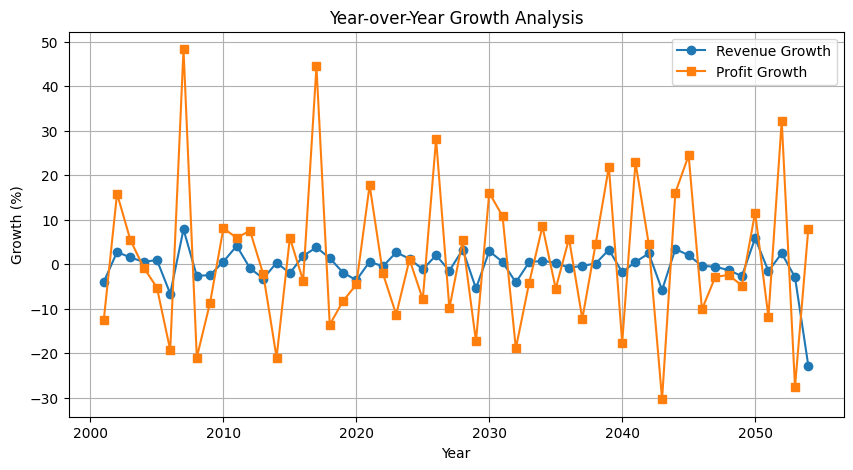

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(yearly_data['Year'], yearly_data['Revenue Growth (%)'], marker='o', label='Revenue Growth')
plt.plot(yearly_data['Year'], yearly_data['Profit Growth (%)'], marker='s', label='Profit Growth')
plt.xlabel('Year')
plt.ylabel('Growth (%)')
plt.title('Year-over-Year Growth Analysis')
plt.legend()
plt.grid()
plt.show()


Summary:
Hypothesis Testing Results

Monthly Profit Hypothesis: (State whether the average monthly profit was significantly greater than $10,000 based on p-value.)
Revenue vs. Expenses: (Mention whether there was a significant difference and which one was higher.)
Trend Analysis Insights

Revenue & Profit Growth Trends: Highlight any notable year-over-year increases or declines.
Significant Changes: Mention any sudden spikes or drops.

Conclusions:
Revenue is relatively stable, with fluctuations year over year. Even when revenue grows, it's not always by a large amount.
Profit is highly volatile, which could be due to external factors like economic conditions, operational inefficiencies, or market shifts.
Exceptional years for profit are 2007, 2017, and 2026, which suggest some factors drove the business to perform much better during those periods.

In [ ]:
#2d]
df["Profit Margin"] = df["Profit"] / df["Revenue"]


In [ ]:
df["Debt-to-Asset Ratio"] = df["Debt"] / df["Assets"]


In [ ]:
df["Current Ratio"] = df["Assets"] / df["Liabilities"]


In [ ]:
print(df[["Profit Margin", "Debt-to-Asset Ratio", "Current Ratio"]].head())


   Profit Margin  Debt-to-Asset Ratio  Current Ratio
0       0.379872             0.739596       1.010402
1       0.768371             0.105039       2.661725
2       0.430745             0.298658       2.256338
3      -0.355082             0.370356       1.679343
4       0.793986             0.197731       3.931202


In [ ]:
df['Profit_Margin'] = df['Profit'] / df['Revenue']
df['Debt_to_Asset_Ratio'] = df['Debt'] / df['Assets']
df['Current_Ratio'] = df['Assets'] / df['Liabilities']

print(df[['Profit_Margin', 'Debt_to_Asset_Ratio', 'Current_Ratio']].describe())



       Profit_Margin  Debt_to_Asset_Ratio  Current_Ratio
count   20000.000000         20000.000000   20000.000000
mean        0.038437             0.330259       2.510174
std         0.635362             0.170575       1.214758
min        -2.916185             0.067132       0.724331
25%        -0.214404             0.201096       1.618994
50%         0.205749             0.300462       2.225907
75%         0.486070             0.419184       3.110887
max         0.848074             0.996622       7.417999


Financial Ratios Interpretation

Profit Margin: Compare against industry standards—does the company have a healthy profit margin?
Debt-to-Asset Ratio: Assess financial stability—higher values may indicate financial risk.
Current Ratio: Indicate liquidity—can the company meet short-term obligations?

Row 1 & 4: Strongest companies—high profit, low debt, and high liquidity.
Row 3: Worst situation—losing money but has decent liquidity.
Row 0: Risky—good profit but heavily dependent on debt.
Row 2: Balanced—moderate profit and debt with good liquidity.

In general, a healthy company should have a profit margin between 10% and 20%, a debt-to-asset ratio between 20% and 50%, and a current ratio between 1.5 and 3.0. Higher profit margins and lower debt are preferable

Row 1 and Row 4 are the strongest companies. They have very high profit margins, low debt, and strong liquidity. These companies are financially healthy and well-positioned for growth.

Row 3 is in trouble because it is losing money. However, it still has decent liquidity, meaning it can cover its short-term liabilities for now. The company needs to cut costs or increase revenue to survive.

Row 0 is profitable but has a high debt-to-asset ratio, meaning it relies heavily on borrowed money. This is risky because too much debt can lead to financial instability.

Row 2 is well-balanced, with a good profit margin, moderate debt, and strong liquidity. It is in a stable financial position.